# Nanodegree Project 1 - Writing a Data Scientist Blog Post

## 1. All imports and libraries settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from utils import *

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pd.set_option('display.max_columns', None)

## 2. Loading and preprocessing data

In [2]:
# Boston data
boston_calendar = pd.read_csv("data\\Boston\\calendar.csv")
boston_listings = pd.read_csv("data\\Boston\\listings.csv")
boston_reviews = pd.read_csv("data\\Boston\\reviews.csv")

# Seattle data
seattle_calendar = pd.read_csv("data\\Seattle\\calendar.csv")
seattle_listings = pd.read_csv("data\\Seattle\\listings.csv")
seattle_reviews = pd.read_csv("data\\Seattle\\reviews.csv")

# Adding city column to data sets
boston_calendar['city'] = 'Boston'
seattle_calendar['city'] = 'Seattle'

boston_listings['city'] = 'Boston'
seattle_listings['city'] = 'Seattle'

boston_reviews['city'] = 'Boston'
seattle_reviews['city'] = 'Seattle'

# Merge data from Boston and Seattle
calendar = pd.concat([boston_calendar, seattle_calendar]).reset_index(drop = True)
listings = pd.concat([boston_listings, seattle_listings]).reset_index(drop = True)
reviews = pd.concat([boston_reviews, seattle_reviews]).reset_index(drop = True)

# Cleaning price columns
calendar.price = calendar.price.apply(remove_dolar)

listings.price = listings.price.apply(remove_dolar)
listings.security_deposit = listings.security_deposit.apply(remove_dolar)
listings.cleaning_fee = listings.cleaning_fee.apply(remove_dolar)
listings.extra_people = listings.extra_people.apply(remove_dolar)

# Cleaning rates columns
listings.host_response_rate = listings.host_response_rate.apply(remove_percent)
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(remove_percent)

# Adjusting date columns data types
calendar.date = pd.to_datetime(calendar.date)
listings.last_scraped = pd.to_datetime(listings.last_scraped)

# Adding day of week name column
calendar['day_name'] = calendar.date.dt.dayofweek + 1
calendar['month'] = calendar.date.dt.month

## 3. Data understanding

### 3.1 Calendar data set
Includes listing id, price and availability for each day

In [3]:
print('Rows: {}\nColumns: {}'.format(calendar.shape[0], calendar.shape[1]))
calendar.head(5)

Rows: 2702460
Columns: 7


,listing_id,date,available,price,city,day_name,month
0,12147973,2017-09-05,f,NaN,Boston,2,9
1,12147973,2017-09-04,f,NaN,Boston,1,9
2,12147973,2017-09-03,f,NaN,Boston,7,9
3,12147973,2017-09-02,f,NaN,Boston,6,9
4,12147973,2017-09-01,f,NaN,Boston,5,9


### 3.2 Listings data set
Provides informations about each listing like: description, localization, size, ratings, host informations, price, etc.

In [4]:
print('Rows: {}\nColumns: {}'.format(listings.shape[0], listings.shape[1]))
listings.head(5)

Rows: 7403
Columns: 95


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100.0,100.0,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United

### 3.3 Reviews data set
Includes unique id for each reviewer and detailed comments about each listing.

In [5]:
print('Rows: {}\nColumns: {}'.format(reviews.shape[0], reviews.shape[1]))
reviews.head(5)

Rows: 153124
Columns: 7


,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Boston
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Boston
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Boston
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Boston
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Boston


## 4. Buisness questions

###  4.1 How much AirBNB homes costs in certain time frames ?
To answer this question we will have to look at the **calendar** data set.

#### 4.1.a Check calendar data set properities

In [6]:
nan_cols = (calendar.isnull().sum()/calendar.shape[0]).sort_values(ascending = False)
nan_cols

price         0.416243
listing_id    0.000000
date          0.000000
available     0.000000
city          0.000000
day_name      0.000000
month         0.000000
dtype: float64

In [7]:
calendar.groupby('available').count()

,listing_id,date,price,city,day_name,month
available,,,,,,
f,1124881,1124881,0,1124881,1124881,1124881
t,1577579,1577579,1577579,1577579,1577579,1577579


Fortunately all **null** values are related to **False** value in **available** column.

#### 4.1.b Averange Prices in Boston and Seattle over time

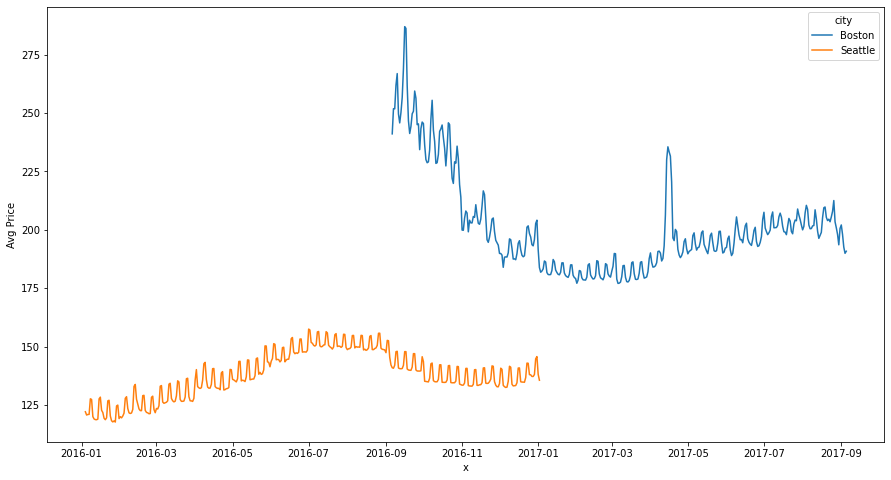

In [8]:
line_plot(calendar, x = 'date', y = 'price', hue = 'city')

The chart shows cyclical indentations that may suggest weekly seasonality. Data for both cities are not in the same periods, in order to compare their annual seasonality, a different chart will be needed.

#### 4.1.c Averange Prices in Boston and Seattle over months

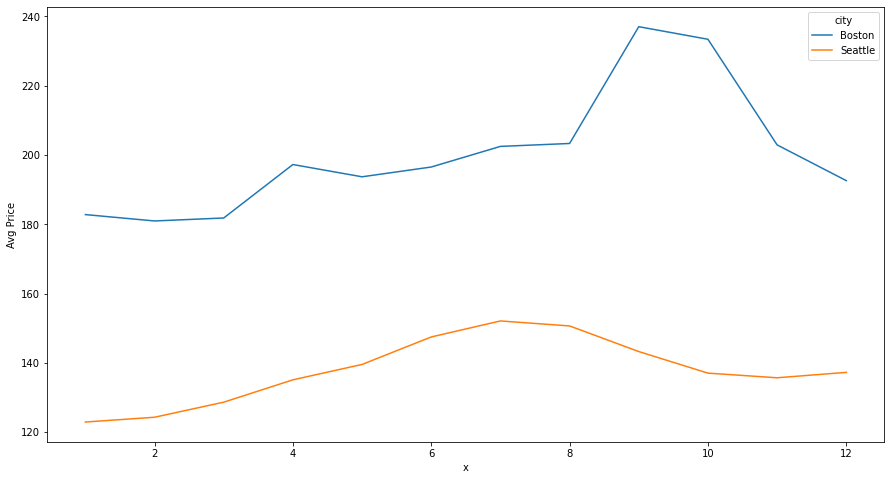

In [9]:
line_plot(calendar, x = 'month', y = 'price', hue = 'city')

The average price in Boston is 198 and Seattle is 128. The difference is significant, but some trends are similar. In the course of the year, we can see price increases during the spring and decreases during the fall. Average price in Boston is highest in September and in Seattle in July.

#### 4.1.d Averange Prices in Boston and Seattle over week days

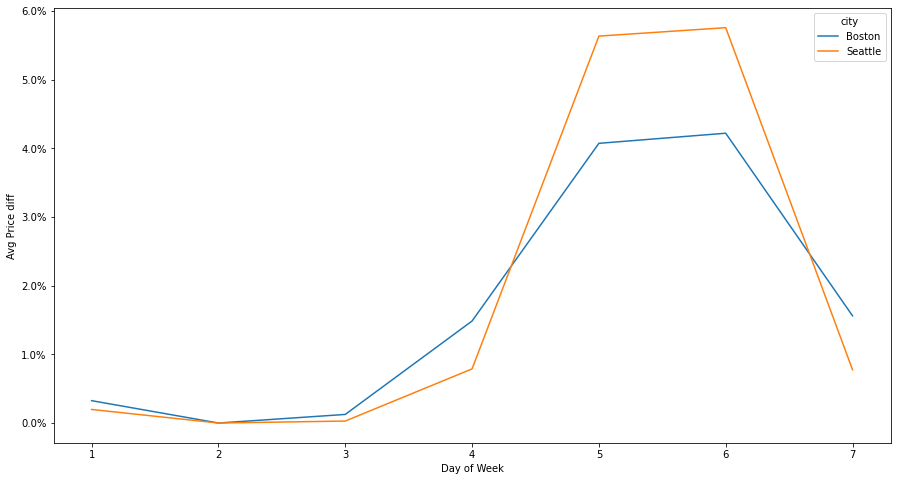

In [10]:
line_plot_percent(calendar, x = 'day_name', y = 'price', hue = 'city')

In both cities, the lowest average price can be recorded on Tuesday. The weekend price increase in Seattle is 6% and in Boston 4%.

###  4.2 How much AirBNB homes costs in certain areas ?
To answer this question we will have to look at the **listings** data set.

In **listings** data set we can find a lot of columns that are not useful for our analysis. We need to chose relevant columns for our buissnes questions.

In [11]:
relevant_columns = ['id', 'price','neighbourhood_cleansed','city']
clean_listings = listings[relevant_columns]
clean_listings.head(5)

,id,price,neighbourhood_cleansed,city
0,12147973,250.0,Roslindale,Boston
1,3075044,65.0,Roslindale,Boston
2,6976,65.0,Roslindale,Boston
3,1436513,75.0,Roslindale,Boston
4,7651065,79.0,Roslindale,Boston


In [12]:
nan_cols = (clean_listings.isnull().sum()/clean_listings.shape[0]).sort_values(ascending = False)
nan_cols.head()

id                        0.0
price                     0.0
neighbourhood_cleansed    0.0
city                      0.0
dtype: float64

No NaN values. We can go straight to the analysis.

#### 4.2.a Prices in Boston

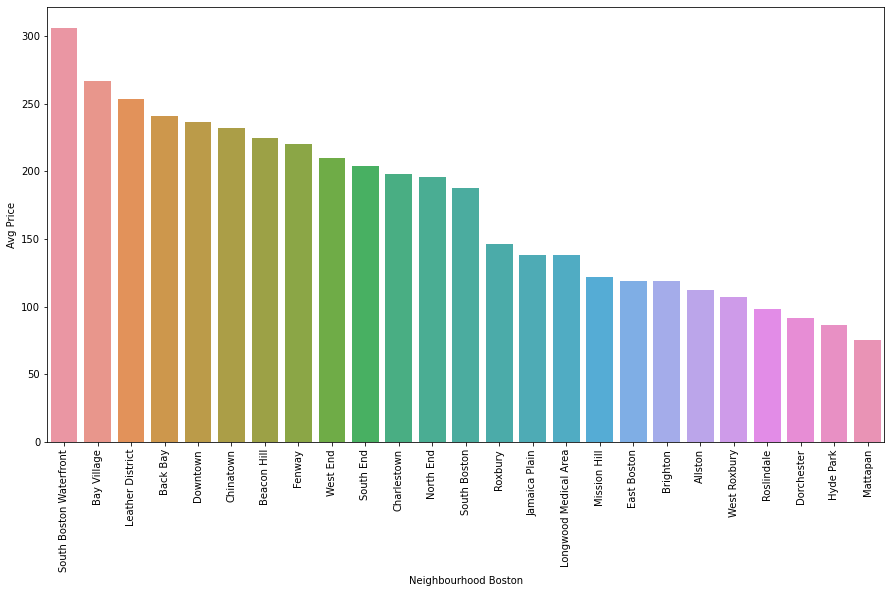

In [13]:
plot_order = bar_plot(clean_listings, 'Boston')

As you can see, location is crucial. The price difference between the most expensive neighborhoods in Boston, such as South Boston Waterfront or Bay Village, and the cheapest ones, such as Hyde Park or Mattapan, can be over $200.

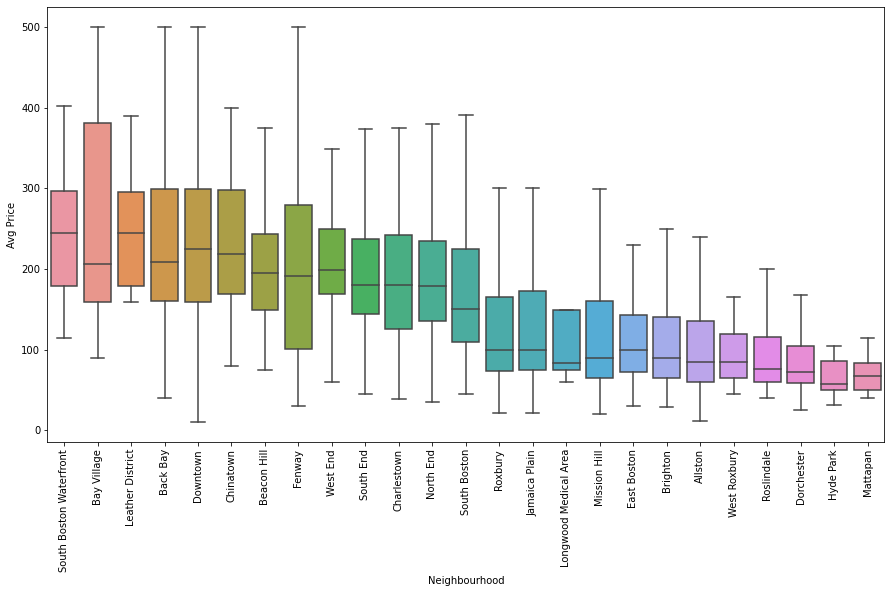

In [14]:
listings_by_area = clean_listings[clean_listings.city == 'Boston']
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=listings_by_area, x="neighbourhood_cleansed", y="price",  showfliers=False, order=plot_order )
ax.set(xlabel='Neighbourhood', ylabel='Avg Price')
plt.xticks(rotation=90)
plt.show()

Some locations like Bay Village have significant differences between the median and the average price. This means that there are outliers.

#### 4.2.b Prices in Seattle

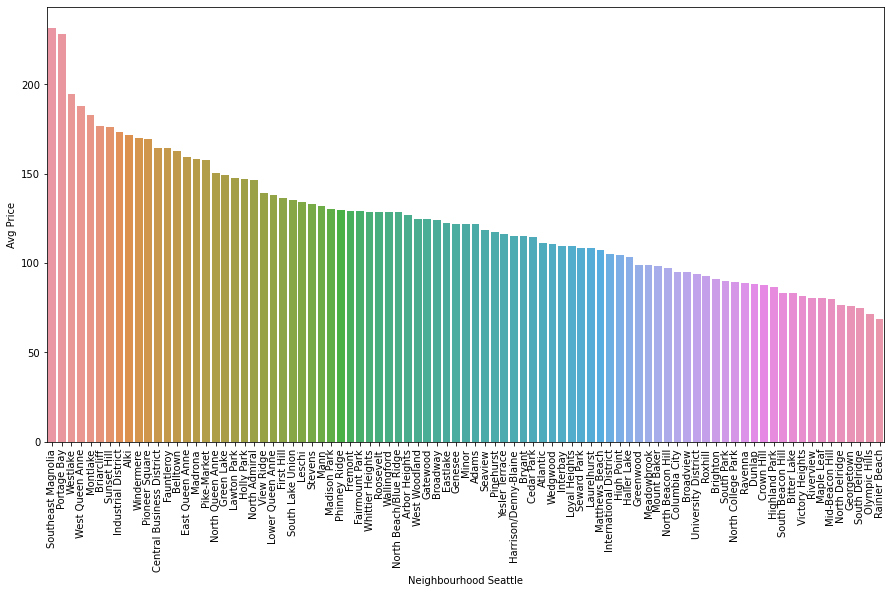

In [15]:
plot_order = bar_plot(clean_listings, 'Seattle')

The most expensive districts in Seattle are Southeast Magnolia and Portage Bay, which can cost up to 200 a night. If you want to save as a tourist you have to move away from the center and choose one of Olympic Hills or Rainier Beach where prices do not exceed 75.

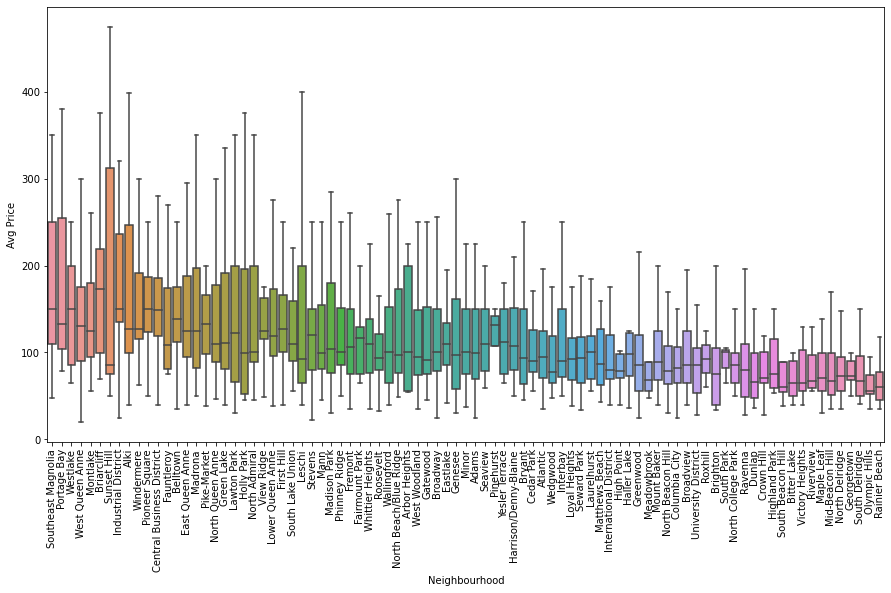

In [16]:
listings_by_area = clean_listings[clean_listings.city == 'Seattle']
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=listings_by_area, x="neighbourhood_cleansed", y="price",  showfliers=False, order=plot_order )
ax.set(xlabel='Neighbourhood', ylabel='Avg Price')
plt.xticks(rotation=90)
plt.show()

In Seaatle, we can also see significant differences between the mean and the median.

### 4.3 What factors influence AirBNB homes price ?

#### 4.3.a Columns chosing
Chosing price relevant columns. It is possible that further verification of the usability of individual columns will be needed.

In [17]:
price_relevant_columns = ['host_response_time', 'host_response_rate','host_acceptance_rate', 'host_is_superhost',\
                          'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count',\
                          'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'city', 'property_type',\
                          'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',\
                          'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',\
                          'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating',\
                          'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',\
                          'review_scores_communication', 'review_scores_value','instant_bookable', 'cancellation_policy',\
                          'require_guest_profile_picture','require_guest_phone_verification', 'reviews_per_month', 'amenities']


clean_listngs = listings[price_relevant_columns]

#### 4.3.b Check for NaN values in columns

In [18]:
nan_cols = (clean_listngs.isnull().sum()/clean_listngs.shape[0]).sort_values(ascending = False)
nan_cols.head(10)

square_feet                    0.979333
security_deposit               0.566662
cleaning_fee                   0.288667
review_scores_accuracy         0.200054
review_scores_checkin          0.199649
review_scores_value            0.199514
review_scores_cleanliness      0.198703
review_scores_communication    0.198433
review_scores_rating           0.197217
reviews_per_month              0.186816
dtype: float64

#### 4.3.c Columns preparation for model
Some of columns like (**square_feet**) holds to much NaN values.  

In [19]:
# Splitings arrey values in amenities columns into dummy variables and droping original column
clean_listngs = split_list_into_columns(clean_listngs, 'amenities')

# Processing price column
clean_listngs.cleaning_fee = clean_listngs.cleaning_fee.fillna(0)
clean_listngs.price = clean_listngs.price + clean_listngs.cleaning_fee

# Dropping unneccecery columns
clean_listngs = clean_listngs.drop(columns =['cleaning_fee', 'host_total_listings_count', 'maximum_nights',\
                                               'minimum_nights', 'square_feet', 'security_deposit'])

To prepare data set we need to split array values in **amenities** column into separete columns. Blanks for **cleaning_fee** are most likely 0 because not every owner decides on the fee.

#### 4.3.d Fitting decision tree model

The rsquared on the training data was 0.935399451586928.  The rsquared on the test data was 0.660116449468694.


<AxesSubplot:ylabel='column'>

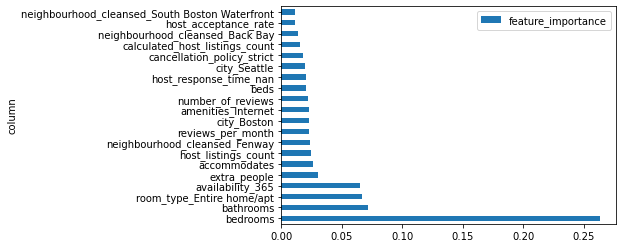

In [20]:
# Check for catoregical columns
cat_df = clean_listngs.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

# Price Model
features_df, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(clean_listngs, 'price', cat_cols_lst, dummy_na=True, rand_state = 46)

# Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

# Checking features importance
features_df = features_df.sort_values(by = ['feature_importance'], ascending = False)
features_df = features_df.set_index('column',drop = True)
features_df.head(20).plot(kind='barh')

In order to check the significance of individual factors, I created a price model. His r squared score is around 0.68. Enough to point out the essentials. As can be seen in the chart, the most important is the number of bedrooms and bathrooms, which indicate the size of the accommodation.

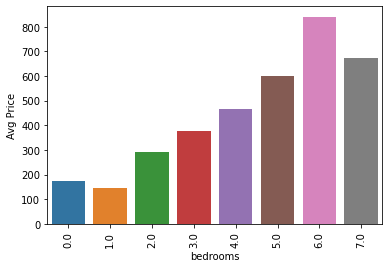

In [21]:
col = 'bedrooms'
df = copy.deepcopy(clean_listngs)
df = df.groupby([col], as_index = False).mean()

ax = sns.barplot(data=df, x=col, y="price")
ax.set(xlabel=col, ylabel='Avg Price')
plt.xticks(rotation=90)
plt.show()

The larger the apartment, the more expensive it is.

#### 4.3.f Ploting amount of bathrooms to mean price 

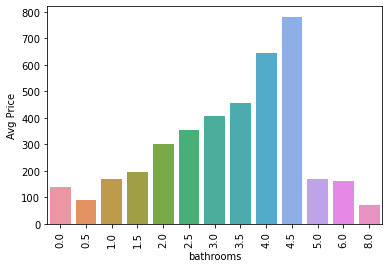

In [22]:
col = 'bathrooms'
df = copy.deepcopy(clean_listngs)
df = df.groupby([col], as_index = False).mean()

ax = sns.barplot(data=df, x=col, y="price")
ax.set(xlabel=col, ylabel='Avg Price')
plt.xticks(rotation=90)
plt.show()

The larger the apartment, the more expensive it is.

#### 4.3.f Ploting room_type to mean price

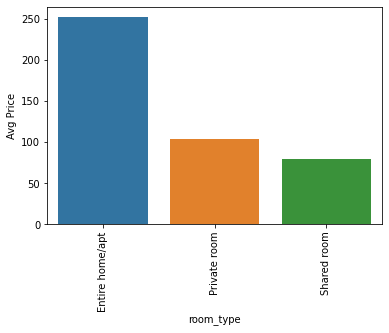

In [23]:
col = 'room_type'
df = copy.deepcopy(clean_listngs)
df = df.groupby([col], as_index = False).mean()

ax = sns.barplot(data=df, x=col, y="price")
ax.set(xlabel=col, ylabel='Avg Price')
plt.xticks(rotation=90)
plt.show()

The more private space, the more expensive it is.